In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# df.isnull().sum().sort_values(ascending=False)

In [ ]:
data = pd.DataFrame(train.isnull().sum(), columns=['Sum'])

In [ ]:
data['Percentage'] = (train.isnull().sum()/891)*100

In [ ]:
data

,Sum,Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis= 1, inplace=True)
test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis= 1, inplace=True)

In [ ]:
perc = ((train['Sex'].value_counts())/len(train))*100
print('percentage of gender:\n',perc)

percentage of gender:
 male      64.758698
female    35.241302
Name: Sex, dtype: float64


In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,NaN,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


In [ ]:
dataset = [train, test]

for data1 in dataset:
    avg = data1['Age'].mean()
    std = data1['Age'].std()
    isnull = data1['Age'].isnull().sum()
    rand_age = np.random.randint(avg-std, avg+std, size=isnull)
    age_1 = data1['Age'].copy()
    age_1[np.isnan(age_1)] = rand_age
    data1['Age'] = age_1

In [ ]:
train['Age'].astype(int)
test['Age'].astype(int)

0      34
1      47
2      62
3      27
4      22
       ..
413    43
414    39
415    38
416    34
417    18
Name: Age, Length: 418, dtype: int64

In [ ]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common = 'S'
train['Embarked'] = train['Embarked'].fillna(common)
test['Embarked'] = test['Embarked'].fillna(common)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

In [ ]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
train.describe()

,Survived,Pclass,Age,FamilySize
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.253838,0.904602
std,0.486592,0.836071,13.606228,1.613459
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000
75%,1.000000,3.000000,37.000000,1.000000
max,1.000000,3.000000,80.000000,10.000000


In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
FamilySize    0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

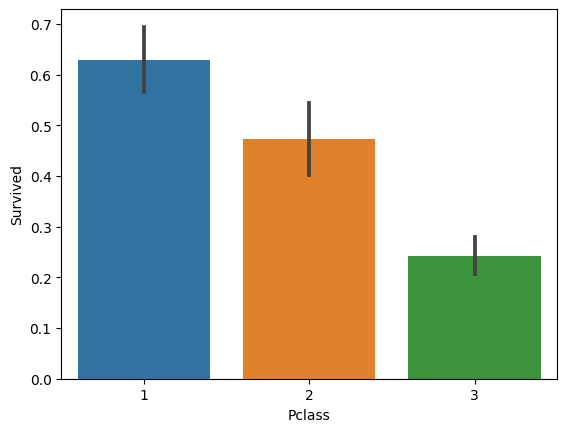

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train)

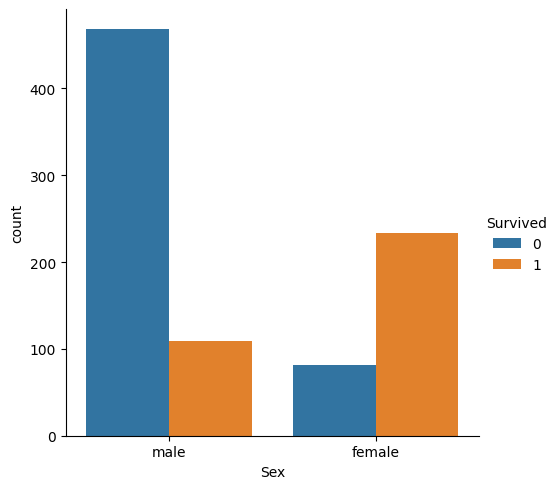

In [ ]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train)

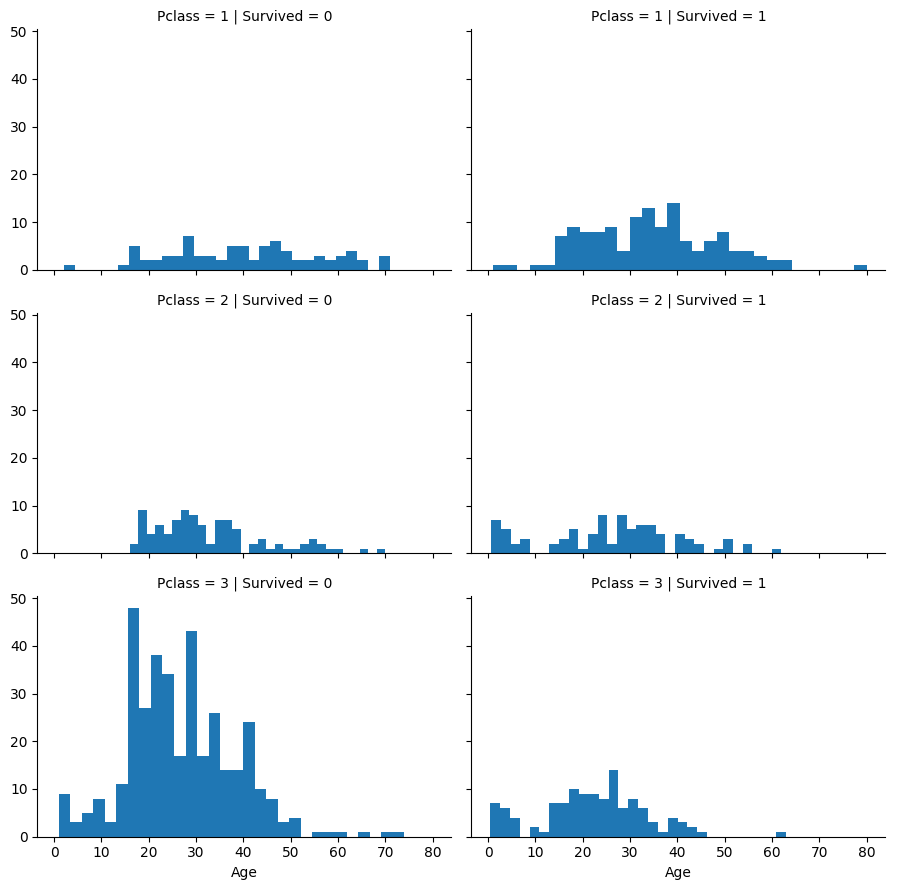

In [ ]:
c = sns.FacetGrid(train, col='Survived' , row='Pclass', aspect=1.5)
c.map(plt.hist, 'Age', bins=30)
c.add_legend();

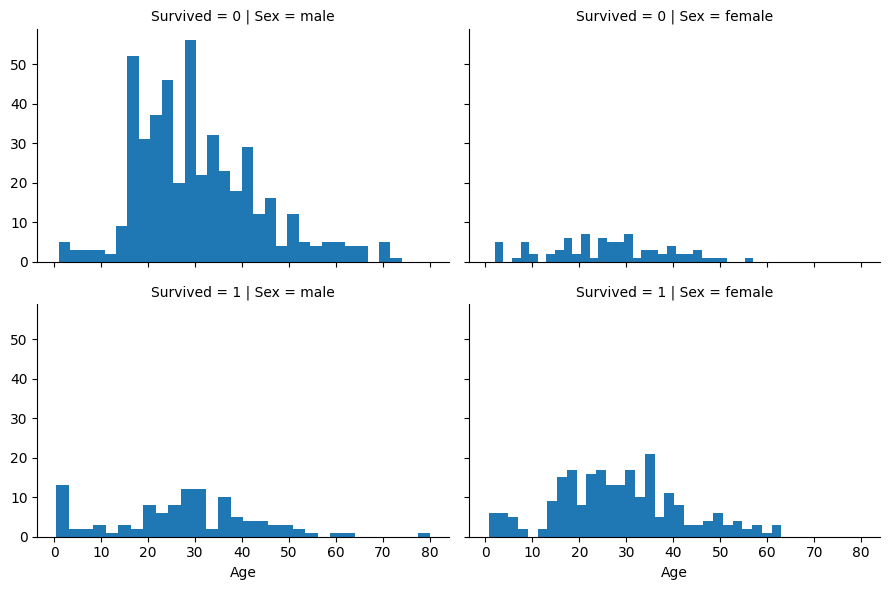

In [ ]:
Gender = sns.FacetGrid(train, col='Sex', row='Survived', aspect=1.5)
Gender.map(plt.hist, 'Age', bins=30)

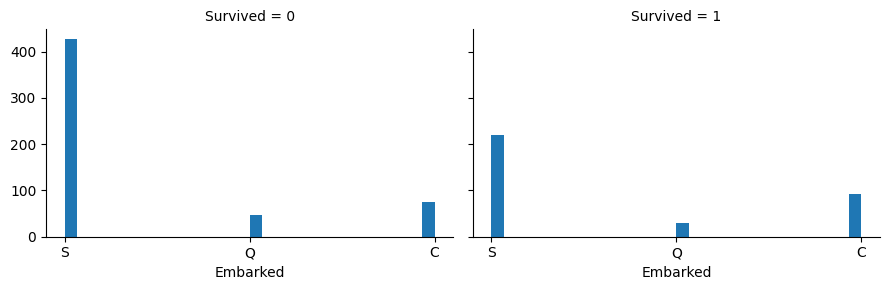

In [ ]:
port = sns.FacetGrid(train, col='Survived', aspect=1.5)
port.map(plt.hist, 'Embarked', bins=30)

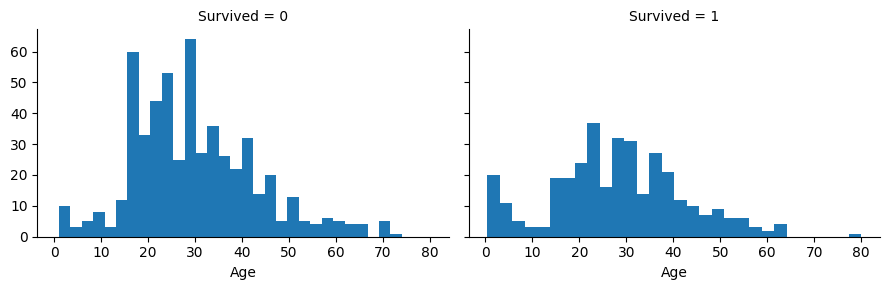

In [ ]:
v2 = sns.FacetGrid(train, col='Survived', aspect=1.5)
v2.map(plt.hist, 'Age', bins=30)

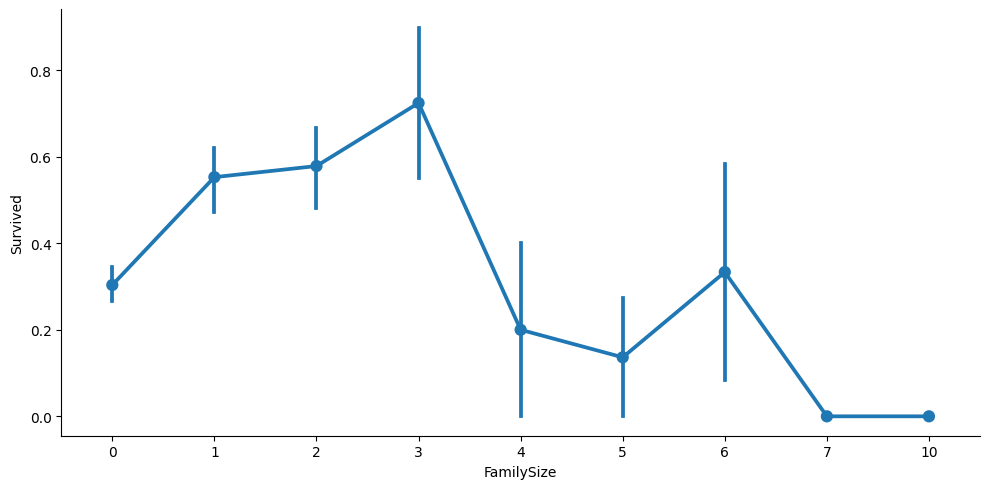

In [ ]:
axes = sns.catplot(x='FamilySize', y='Survived', data = train, kind='point', aspect=2)

<ipython-input-32-249801d73790>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

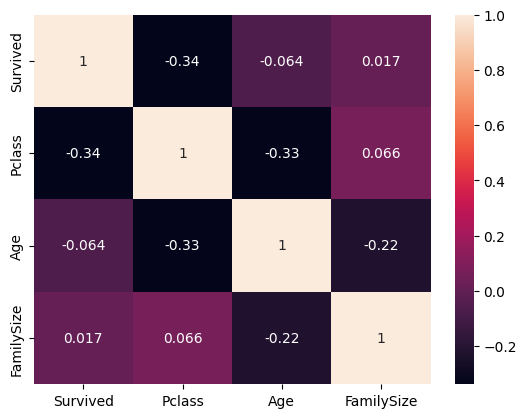

In [ ]:
corr = train.corr()
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in train:
    train[i] = label_encoder.fit_transform(train[i])
for i in test:
    test[i] = label_encoder.fit_transform(test[i])

In [ ]:
train

,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,2,1,28,2,1
1,1,0,0,51,0,1
2,1,2,0,34,2,0
3,1,0,0,47,2,1
4,0,2,1,47,2,0
...,...,...,...,...,...,...
886,0,1,1,35,2,0
887,1,0,0,24,2,0
888,0,2,0,52,2,3
889,1,0,1,34,0,0


In [ ]:
test

,Pclass,Sex,Age,Embarked,FamilySize
0,2,1,44,1,0
1,2,0,60,2,1
2,1,1,74,1,0
3,2,1,34,2,0
4,2,0,27,2,2
...,...,...,...,...,...
413,2,1,56,2,0
414,0,0,51,0,0
415,2,1,50,2,0
416,2,1,43,2,0


In [ ]:
x = train.iloc[:, 1:].values
y = train.iloc[:, :1].values

In [ ]:
x.shape, y.shape

((891, 5), (891, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x.shape

(891, 5)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.2)

In [ ]:
models = {}

from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

from sklearn.svm import SVC
models['RBF SVC'] = SVC(kernel='rbf')
models['Polynomial SVC'] = SVC(kernel='poly')

from sklearn.tree import DecisionTreeClassifier
models['Decision Tree'] = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators = 100)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy = {}
model_score = {}

for key in models.keys():
    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # model score
    model_score[key] = models[key].score(x_train, y_train)

    # Calculate metrics
    accuracy[key] = accuracy_score(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-42-dcc5722274a7>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models[key].fit(x_t


 Logistic Regression  Values Predicted Correctly:  142  and Values predicted incorretly:  37 



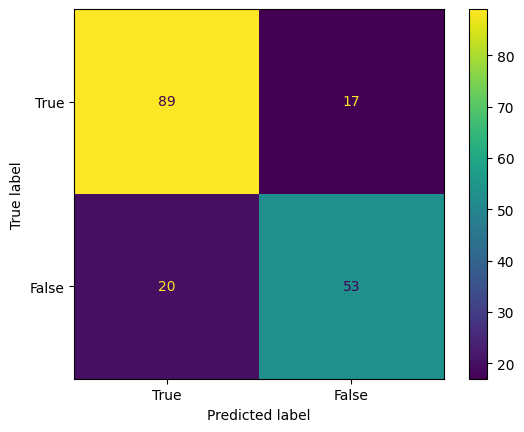


 RBF SVC  Values Predicted Correctly:  139  and Values predicted incorretly:  40 



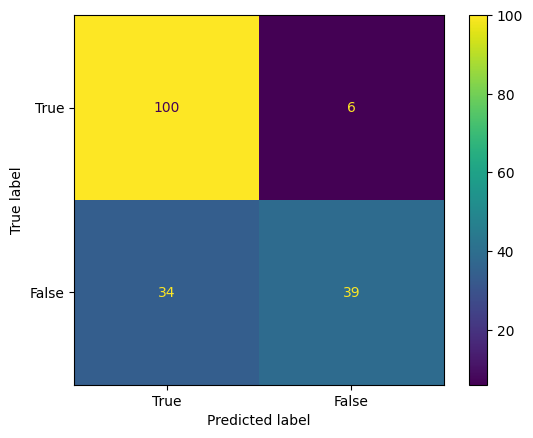


 Polynomial SVC  Values Predicted Correctly:  140  and Values predicted incorretly:  39 



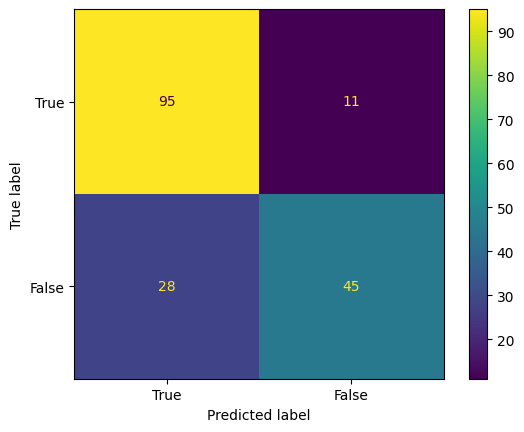


 Decision Tree  Values Predicted Correctly:  137  and Values predicted incorretly:  42 



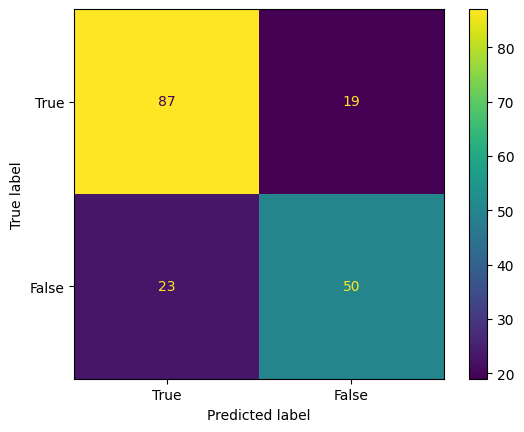


 Random Forest  Values Predicted Correctly:  137  and Values predicted incorretly:  42 



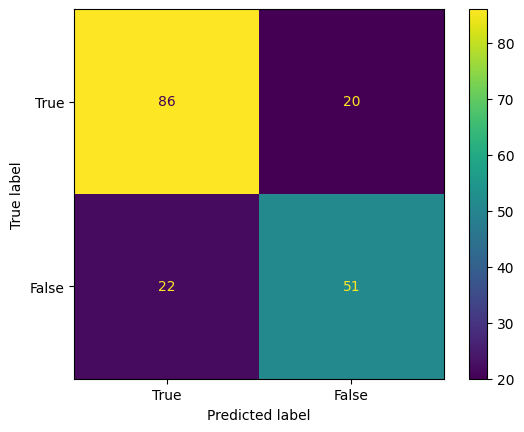

In [ ]:
for key in models.keys():
    # creating confusion metric for all model
    predictions = models[key].predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_test, predictions)
    print('\n',key," Values Predicted Correctly: ", confusion_matrix[0][0]+confusion_matrix[1][1]," and Values predicted incorretly: ",confusion_matrix[0][1]+confusion_matrix[1][0],"\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
    cm_display.plot()
    plt.show()

In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Model Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Model Score'] = model_score.values()
df_model

,Accuracy,Model Score
Logistic Regression,0.793296,0.797753
RBF SVC,0.776536,0.844101
Polynomial SVC,0.782123,0.831461
Decision Tree,0.765363,0.948034
Random Forest,0.765363,0.948034
